# everything up to getting the indices of the potential minimum

In [1]:
import numpy as np
import h5py
import glob, os, re, sys
import pickle
from pathlib import Path
sys.path.append('../')

from GriddedData import GriddedDataset
import astro_helper as ah

import configparser
config = configparser.ConfigParser()
config.read('./config_test.ini')

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as patches
from matplotlib import rc
rc('axes', linewidth=1.5)
rc('axes', edgecolor='#3C3C3C')
plt.style.use('mpl_style_Jeffreson.mplstyle')
custom_colors = {
    'grey': '#3C3C3C',
    'turquoise': '#5E9F87'
}

In [2]:
gal = GriddedDataset(
    params = config["ETG-vlM"],
    galaxy_type="ETG-vlM",
    total_height=0.3, # kpc
    zbin_width_ptl=10., # so it's quicker for checking
    xymax=2., # kpc
    snapname="snap-DESPOTIC_100.hdf5",
    exclude_temp_above=float(config['ETG-vlM'].get('EXCLUDE_TEMP')),
    exclude_avir_below=float(config['ETG-vlM'].get('EXCLUDE_AVIR')),
    exclude_HII=True,
    realign_galaxy_to_gas=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

In [3]:
# check a random time for each array
i = 2

# dm voldens check

In [6]:
folder = str(Path(config["ETG-vlM"]["ROOT_DIR"]) / Path(config["ETG-vlM"]["SUBDIR"]))
with open(folder+"/dm_voldens_124_ETG-vlM.pkl", "rb") as f:
    dm_dict = pickle.load(f)
print(dm_dict.keys())
print([val.shape for key, val in dm_dict.items()])

dict_keys(['dm_voldens'])
[(50, 50, 25)]


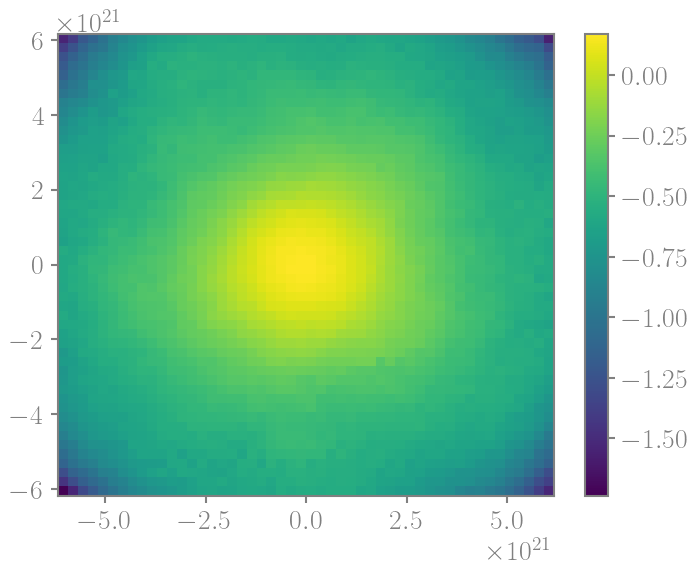

In [9]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(dm_dict['dm_voldens'][:,:,i] / ah.Msol_to_g * ah.pc_to_cm**3),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

# cool-gas properties check

In [18]:
folder = str(Path(config["ETG-hiM"]["ROOT_DIR"]) / Path(config["ETG-hiM"]["SUBDIR"]))
with open(folder+"/coolgas_399_ETG-hiM_T2.0e+04_avir2.0e+00.pkl", "rb") as f:
    coolgas_dict = pickle.load(f)
print(coolgas_dict.keys())
print([val.shape for key, val in coolgas_dict.items()])

dict_keys(['gas_surfdens', 'gas_voldens_midplane', 'star_voldens_midplane', 'veldisp_midplane', 'Pturb', 'Ptherm'])
[(50, 50, 25), (50, 50, 25), (50, 50, 25), (50, 50, 25), (50, 50, 25), (50, 50, 25)]


/tmp/ipykernel_3354699/232748685.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(coolgas_dict['Ptherm'][:,:,i]),


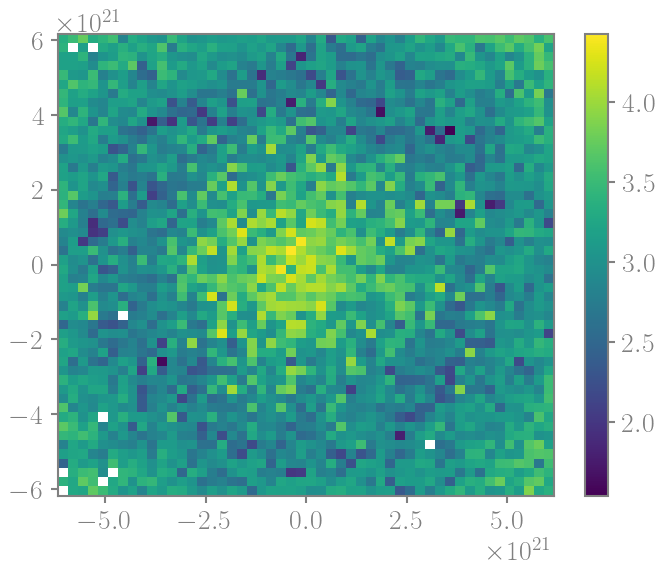

In [19]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(coolgas_dict['Ptherm'][:,:,i]),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

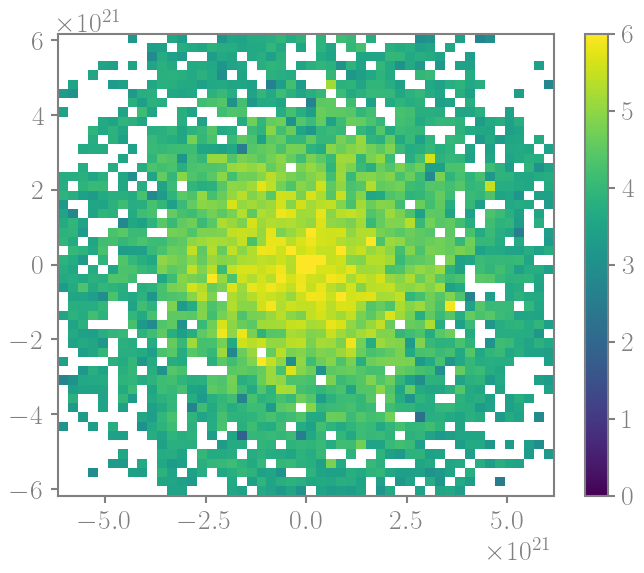

In [20]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(coolgas_dict['Pturb'][:,:,i]),
               vmin=0., vmax=6.,
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

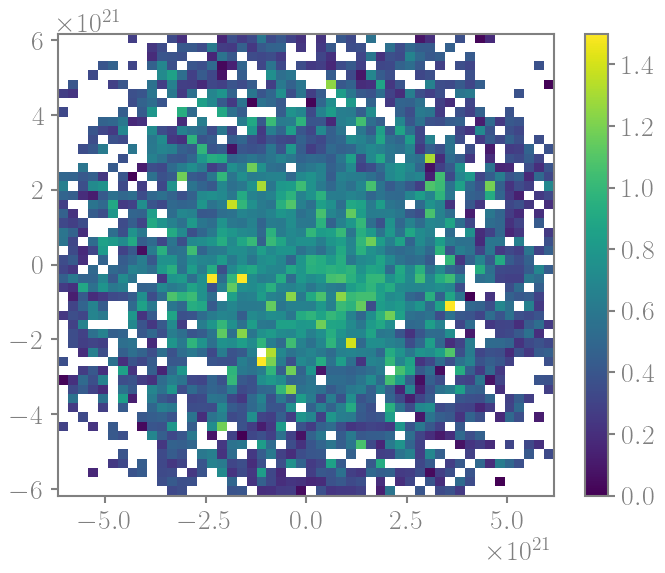

In [21]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(coolgas_dict['veldisp_midplane'][:,:,i]/ah.kms_to_cms),
               vmin=0., vmax=1.5,
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

/tmp/ipykernel_3354699/1197781259.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(coolgas_dict['gas_voldens_midplane'][:,:,i]/ah.mp_cgs),


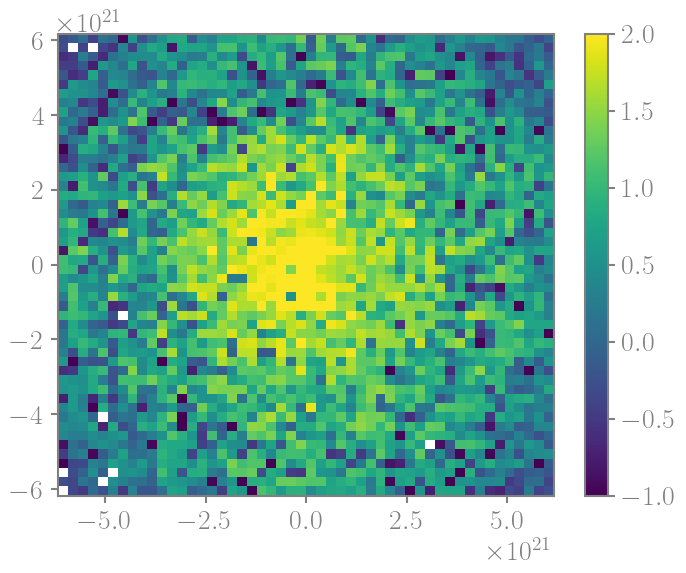

In [22]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(coolgas_dict['gas_voldens_midplane'][:,:,i]/ah.mp_cgs),
               vmin=-1., vmax=2.,
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

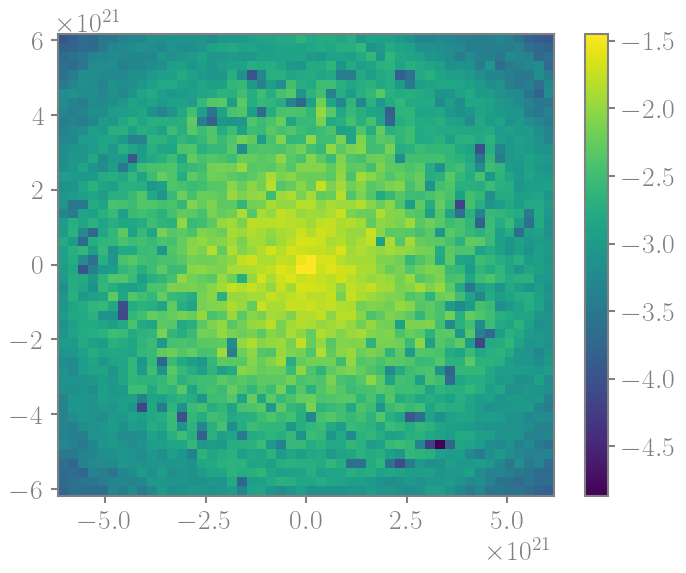

In [23]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(coolgas_dict['gas_surfdens'][:,:,i]),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

# all-gas properties check

In [24]:
folder = "/n/holystore01/LABS/itc_lab/Users/sjeffreson/ETGs/hiM-output/"
with open(folder+"allgas_224_ETG-hiM.pkl", "rb") as f:
    allgas_dict = pickle.load(f)
print(allgas_dict.keys())
print([val.shape for key, val in allgas_dict.items()])

dict_keys(['rotcurve', 'kappa', 'SFR_surfdens', 'H2_frac', 'HI_frac', 'gas_surfdens', 'star_surfdens', 'gas_voldens_midplane', 'star_voldens_midplane'])
[(50, 50, 25), (50, 50, 25), (50, 50, 25), (50, 50, 25), (50, 50, 25), (50, 50, 25), (50, 50, 25), (50, 50, 25), (50, 50, 25)]


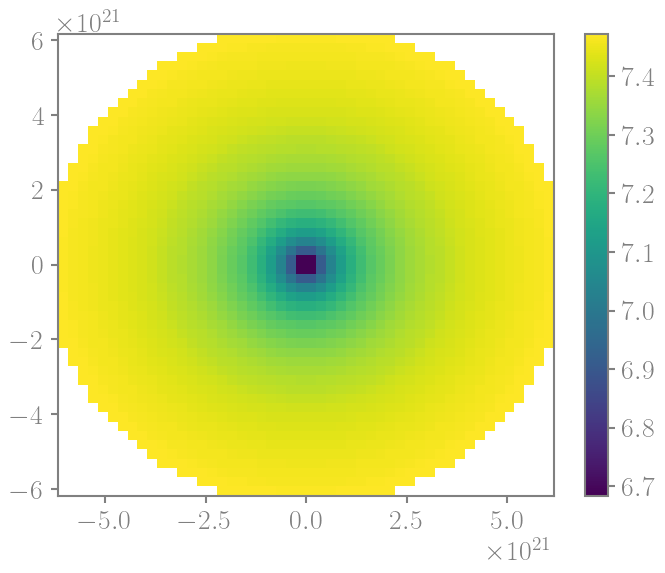

In [25]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(allgas_dict['rotcurve'][:,:,i]),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

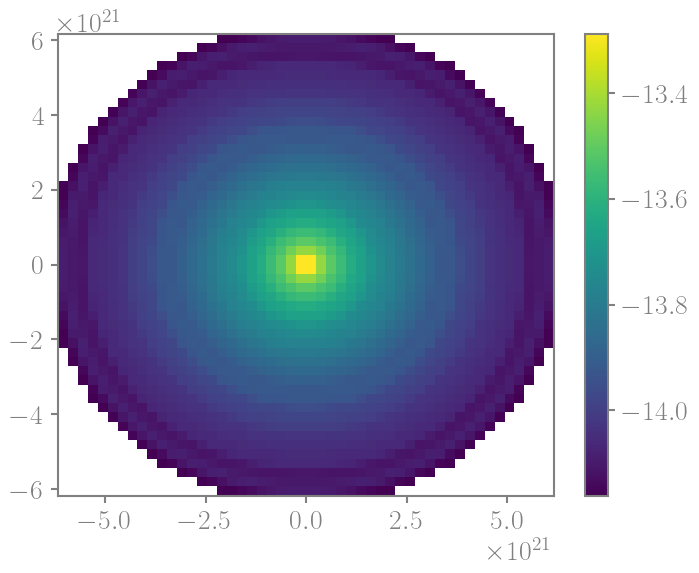

In [26]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(allgas_dict['kappa'][:,:,i]),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

/tmp/ipykernel_3354699/2155240895.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(allgas_dict['SFR_surfdens'][:,:,i]),


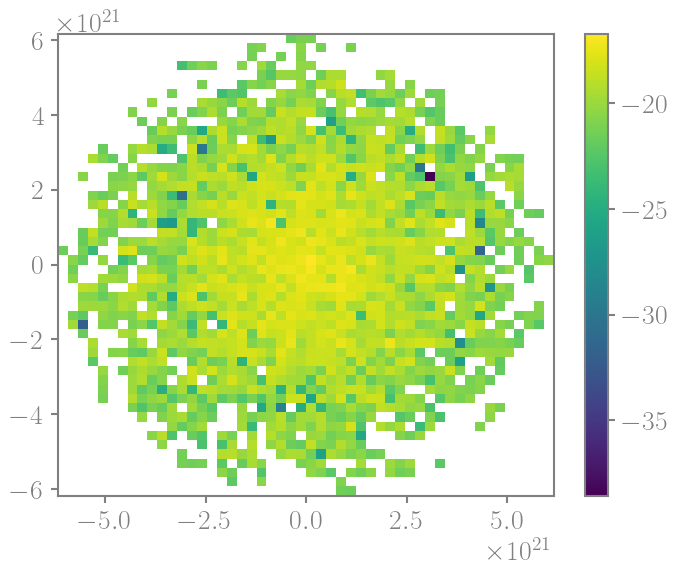

In [27]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(allgas_dict['SFR_surfdens'][:,:,i]),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

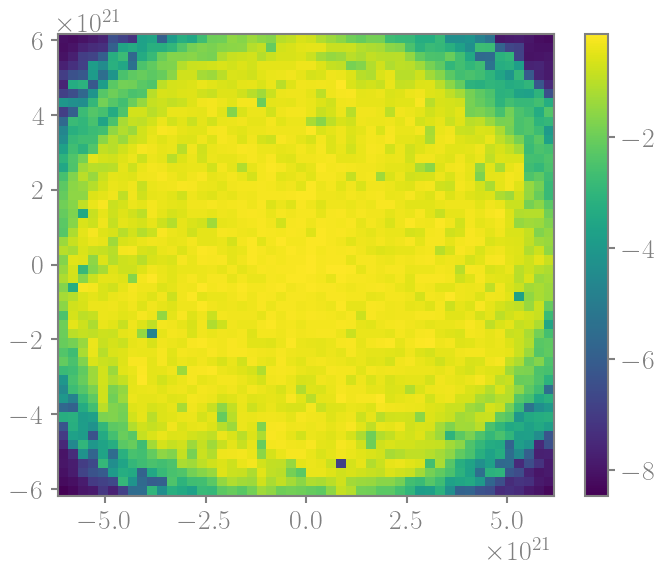

In [28]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(allgas_dict['H2_frac'][:,:,i]),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

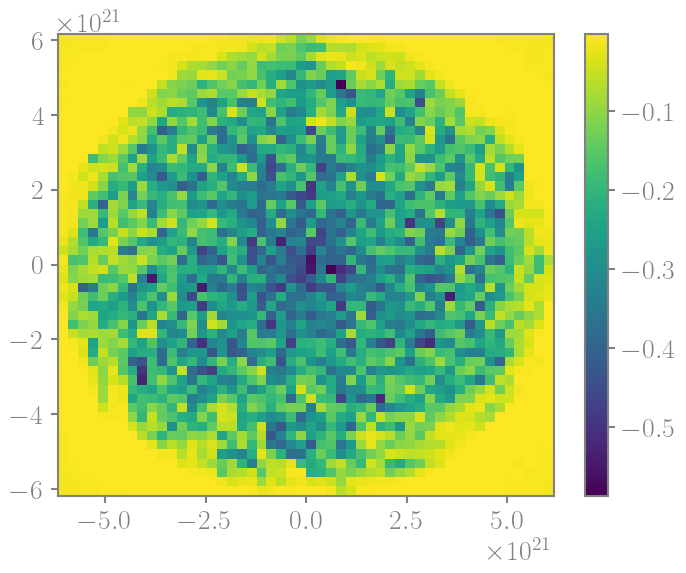

In [29]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(allgas_dict['HI_frac'][:,:,i]),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

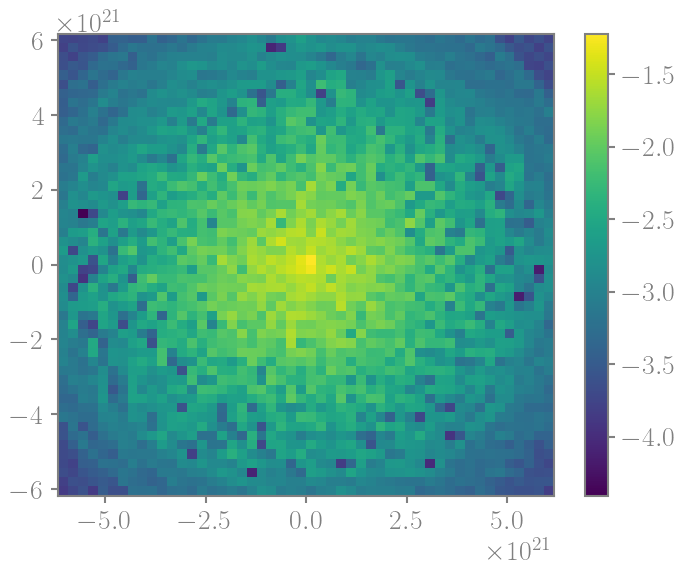

In [30]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(allgas_dict['gas_surfdens'][:,:,i]),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

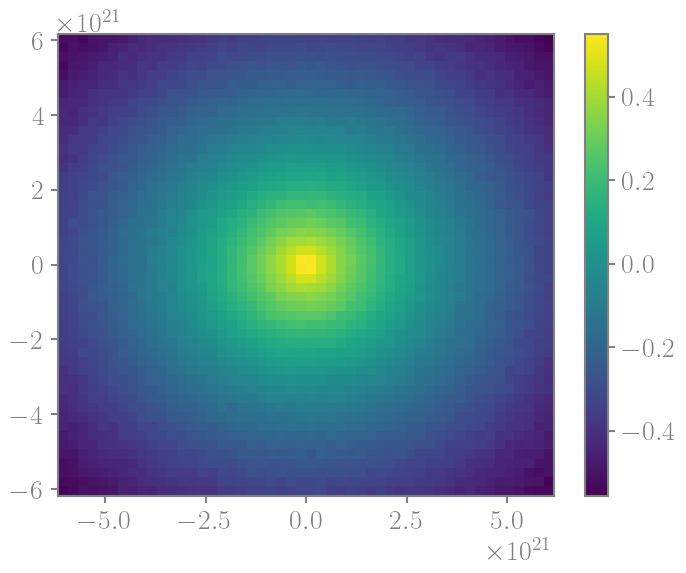

In [31]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(allgas_dict['star_surfdens'][:,:,i]),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

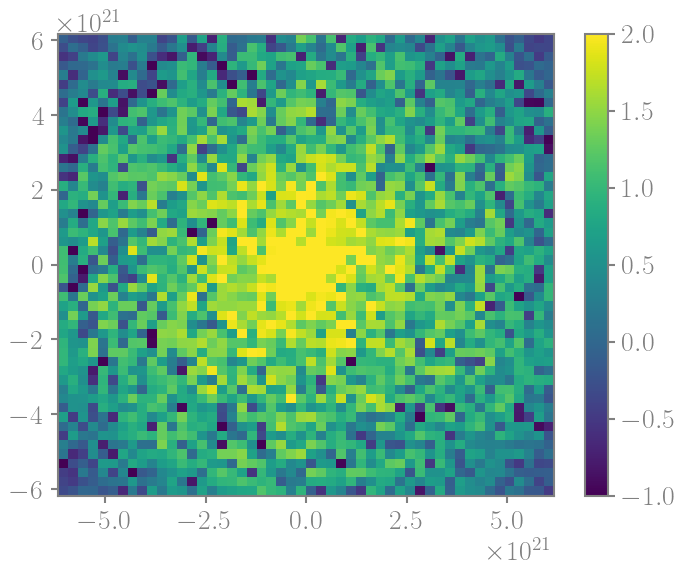

In [34]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(allgas_dict['gas_voldens_midplane'][:,:,i]/ah.mp_cgs),
               cmap='viridis', shading='auto', vmin=-1., vmax=2.)
plt.colorbar()
plt.show()

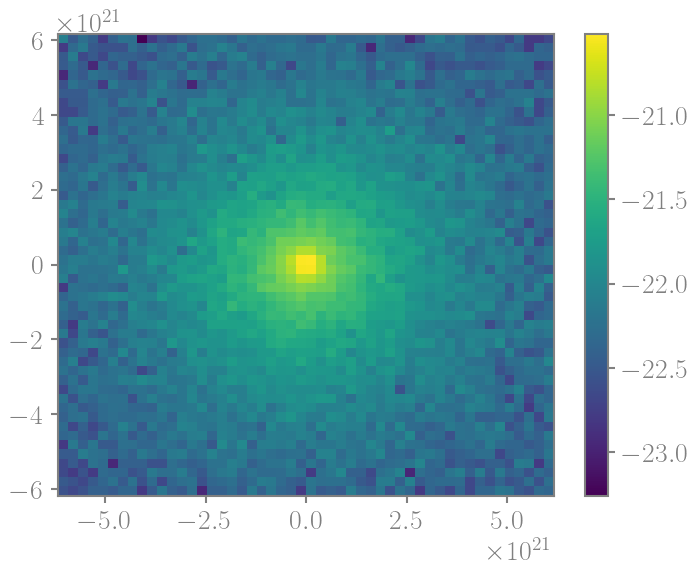

In [35]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(allgas_dict['star_voldens_midplane'][:,:,i]),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

# maximum volume densities at 80pc scale along the line of sight

In [45]:
folder = "/n/holystore01/LABS/itc_lab/Users/sjeffreson/ETGs/lowM-output/"
with open(folder+"voldens_224_ETG-lowM.pkl", "rb") as f:
    allgas_dict = pickle.load(f)
print(allgas_dict.keys())
print([val.shape for key, val in allgas_dict.items()])

dict_keys(['gas_voldens', 'dm_voldens'])
[(50, 50, 25), (50, 50, 25)]


/tmp/ipykernel_3354699/4274739250.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(allgas_dict['gas_voldens'][:,:,i]/ah.mu/ah.mp_cgs),


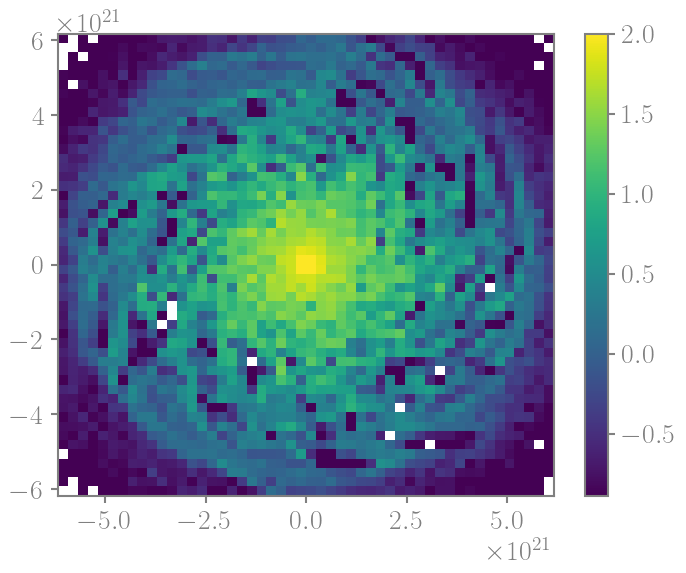

In [46]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(allgas_dict['gas_voldens'][:,:,i]/ah.mu/ah.mp_cgs),
               cmap='viridis', shading='auto', vmin=np.log10(0.13), vmax=2.)
plt.colorbar()
plt.show()

# Forces check

In [20]:
folder = "/n/holystore01/LABS/itc_lab/Users/sjeffreson/ETGs/vlM-output/"
with open(folder+"Forces_324_ETG-vlM_T2.0e+04_avir2.0e+00.pkl", "rb") as f:
    Forces_dict = pickle.load(f)
print(Forces_dict.keys())
print([val.shape for key, val in Forces_dict.items()])

dict_keys(['weight', 'PtlMinIdcs', 'ForceLeft', 'ForceRight', 'Force'])
[(50, 50, 25), (50, 50, 25), (50, 50, 25), (50, 50, 25), (50, 50, 25)]


/tmp/ipykernel_3722729/3985963442.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(Forces_dict['weight'][:,:,i]),


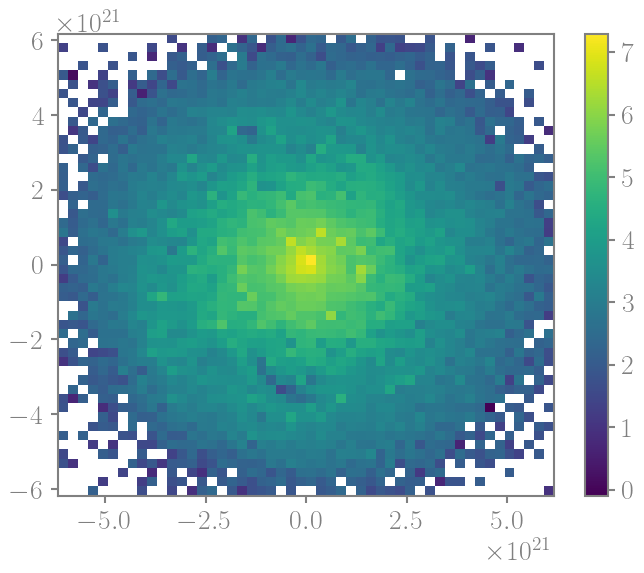

In [6]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(Forces_dict['weight'][:,:,i]),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

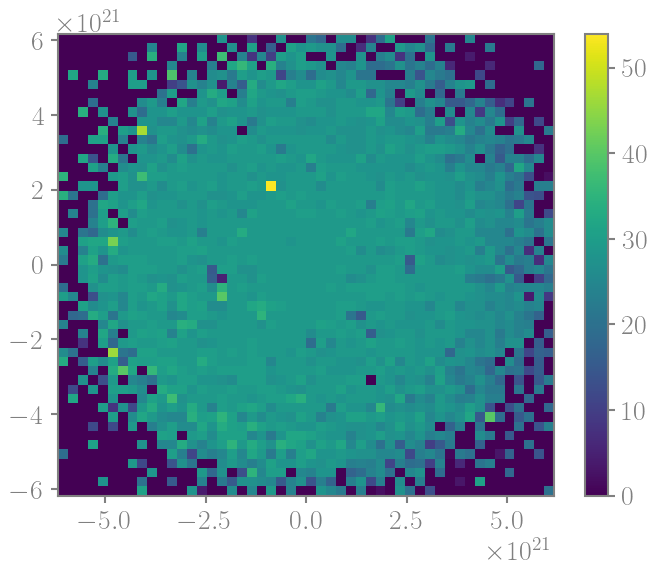

In [7]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, Forces_dict['PtlMinIdcs'][:,:,i],
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

/tmp/ipykernel_3722729/4230065312.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(np.fabs(Forces_dict['ForceLeft'][:,:,i])),


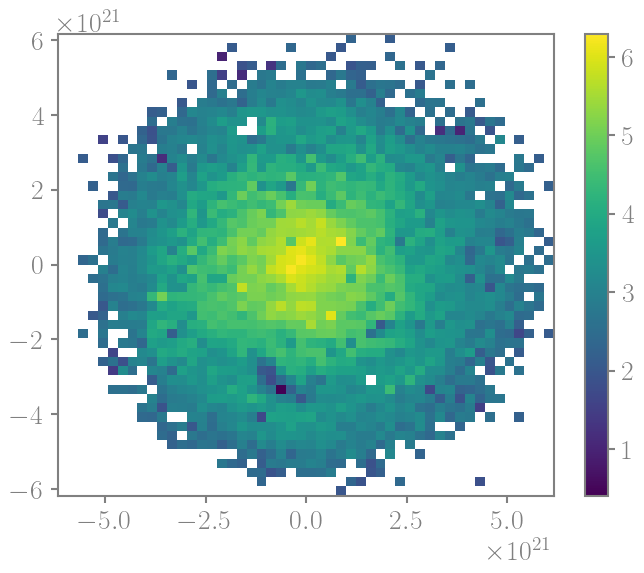

In [8]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(np.fabs(Forces_dict['ForceLeft'][:,:,i])),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

/tmp/ipykernel_3722729/2096455057.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(np.fabs(Forces_dict['ForceRight'][:,:,i])),


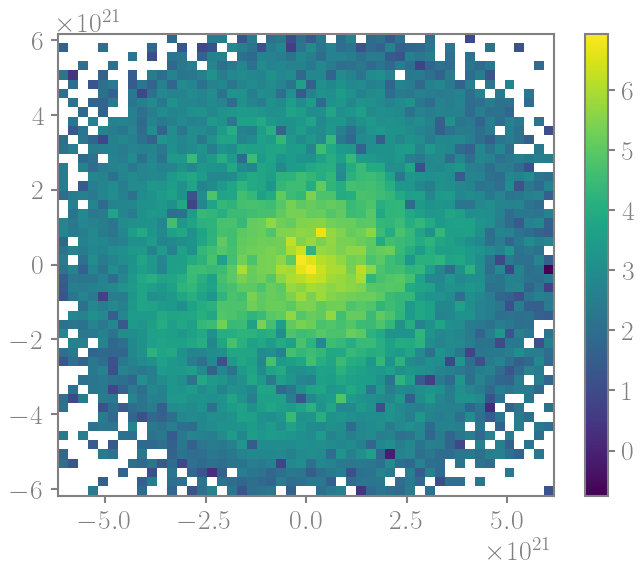

In [9]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(np.fabs(Forces_dict['ForceRight'][:,:,i])),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

/tmp/ipykernel_3722729/3279876972.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(np.fabs(Forces_dict['Force'][:,:,i])),


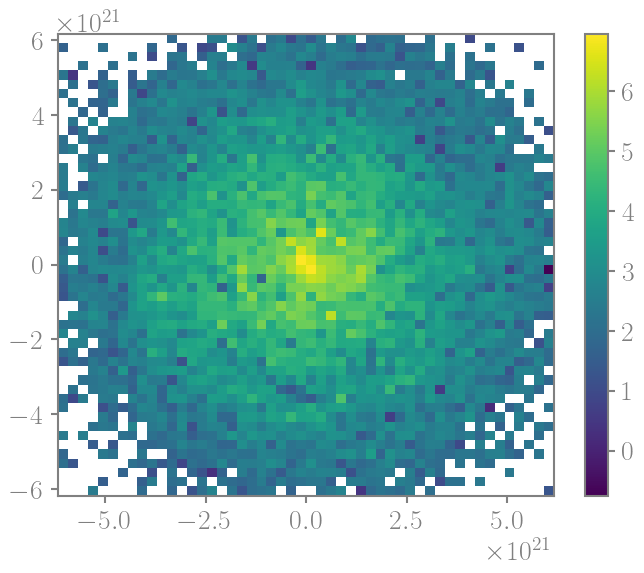

In [10]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(np.fabs(Forces_dict['Force'][:,:,i])),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()